# Soc. 5 Spring 2019

## Project 5: Constructing and Analyzing Data Tables

**Due:** Tuesday, April 16, 2019 at 11:59 pm
<br>
*Submit via bCourses*

## Introduction

Over the past decade, support for gay marriage rights has increased tremendously.  But this is still a contentious issue.  Your task in this project will be to analyze cross-generational differences in support for gay marriage.

To answer these questions, you will use two files, downloaded from http://sda.berkeley.edu/archive.htm, concerning the 2016 General Social Survey. This data is similar to the GSS 2014 data that you worked with for the last couple of discussions, but, as you will see, there are key differences. 

The two files are:
*  `GSS_2016_sample.csv` - dataset containing a subset of observations taken from the 2016 survey
*  `GSS 2016 codebook.pdf` - lists the variables in the dataset and explains what each means and how each is coded; i.e., how each numeric value corresponds to a substantive response.

## Important Notes
You will submit a 4-6 pages long (6 pages maximum) write-up describing your analysis of the data, as well as your findings and conclusions. To clean the data and generate the graphs, tables, and statistics that you will use in your write up, you have three options:
1. Microsoft Excel, Google Sheets, or a similar spreadsheet software
2. STATA (Link to accessing STATA via Citrix is available [here](https://software.berkeley.edu/stata))
3. Jupyter + Python 

If you choose the 3rd option, then proceed through the rest of this notebook. You will not need to submit this notebook, but we expect you to answer the questions within this notebook in your write-up.

If you are intimidated at the thought of coding in Python, don't be! This notebook is designed to walk you through the whole process, step by step. If you have not done so yet, please review:
* the `Discussion 1` notebook
* the 1st notebook labeled `Useful Functions`, located in the same folder as this project

These notebooks contain examples and helpful information that you might need in order to complete the following parts.

Once you have done that, let's get started!

### Loading in the Data

Let's load the data from the `Data` folder, into our current notebook.

In [ ]:
# Import the functions we need
from functions import *
%matplotlib inline

# Load the data into the notebook
raw_data = Table.read_table("Data/GSS_2016_sample.csv")
raw_data

Now that we have the table, we need to figure what each column represents. Take a look at the `GSS 2016 codebook` PDF file, which is contained within the Data folder, which is in the same folder as this notebook.

If your browser has problems opening the PDF, try downloading it to your computer. To do this:

1. Navigate inside the Data folder
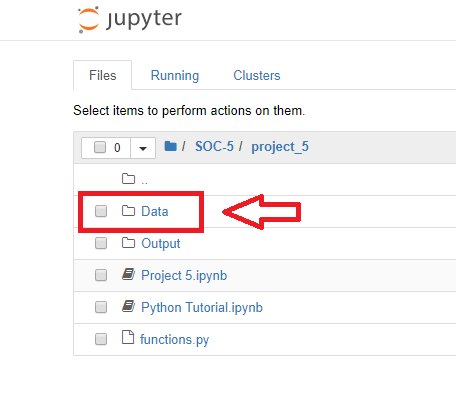
2. Check the box next to the `GSS 2016 codebook.pdf` file
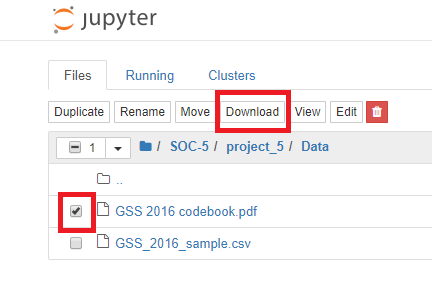
3. Click the "Download" button on the top toolbar

Now that we have the codebook open, we can answer the following questions about the data.
#### Question
What does each variable stand for? What is range of values it can take? (Double click on the next cell to edit it)

**Answer:**

#### Question
For each column, what numbers stand for missing, invalid, NA, or DK values?

**Answer:**

### Cleaning the Data

Unlike the data you analyzed in the previous two discussions, this data has not been preprocessed; it still contains missing and invalid values. In order to prevent these values from throwing off our analysis, we need to first "clean" the data. That is, we need to remove all the missing, invalid, NA, or DK values from the table.

In the next few cells, we'll use the function `filter_values` to filter the `raw_data` table to keep only the values we want. Run the following cell to get started.

In [ ]:
cleaned_data = raw_data

Let's first fix the`AGE` variable. We only want valid, non-missing values, so we want to filter the table to drop rows that have missing values in the `AGE` column. In this case, the numbers 0, 98, and 99 represent invalid values in the `AGE` column.

In [ ]:
removed_values = array(0, 98, 99)
cleaned_data = filter_values(cleaned_data, "AGE", removed_values)

#### Question
Now, it's your turn! 

Let's address the `SEX` column. Sex only has two values that it can take on. Fill in the `removed_values` array with the number(s) that stand for missing values. 
<details> 
  <summary> <b> Hint <b> </summary>
      As you can see in the codebook, SEX only has two values that it can take on. What is the value that stands for missing values?
</details>

In [ ]:
removed_values = array(...)
cleaned_data = filter_values(cleaned_data, "SEX", removed_values)

Now do the same for `RACECEN1`

<details> 
  <summary> <b> Hint <b> </summary>
  (Feel free to copy from the previous code cell if you're stuck!)
   Consider the Race variable in the codebook. What numbers stand for missing values?  
   Use the function `filter_values()` to keep the range of values we want. 
</details>

In [ ]:
removed_values = array(...)
cleaned_data = ...

 and for the `HISPANIC` variable.

In [ ]:
removed_values = array(...)
cleaned_data = ...

Let's now clean the `EDUC` column.

In [ ]:
removed_values = array(...)
cleaned_data = ...

The only variable left that needs to be addressed is `MARHOMO`, which represents the participants' stance on marriage equality. We can use the same process as above.

In [ ]:
removed_values = array(...)
cleaned_data = ...

All set! We're ready to start our analysis. Notice that our cleaned data table has considerably fewer rows than the raw data.

In [ ]:
cleaned_data

### Distribution table of ages

#### Question
What is the level of measurement for `AGE`?

<details>
 <summary> Click here for a review of the levels of measurement discussed in lecture </summary>

- __Ratio variable__ - This is a type of interval variable, but with the added condition that it is not possible to have negative values 
    - example: Height (can not be negative)
- __Interval variable__ - The intervals between the values of the interval variables are equally spaced. 
    - example: Temperature (10-20 degrees, 20-30 degrees 30-40 degrees etc.)
- __Ordinal variable__ - A type of variable where there is a clear ordering of the variables. 
    - example: Places in a race (1st, 2nd, 3rd place)      
- __Nominal variable__ - This variable is a type of categorical and has two or more categories without haviny any kind of natural order.
    - example: Eye color (brown, blue, hazel, green etc.)
</details>

**Answer:**

#### Question

Based on your answer above, compute the relevant measures of central tendency (mean, median, mode) using the functions you've seen earlier in Discussion 1 and in the `Useful Functions` notebook. **Note:** You might not use all 3 cells.

In [ ]:
### Example
np.mean(cleaned_data.column("AGE"))

In [ ]:
### YOUR CODE HERE


In [ ]:
### YOUR CODE HERE


#### Question

In the next cell, use the `histogram()` function to visualize the distribution of the `AGE` column in your `cleaned_data` table. Feel free to refer to the `Useful Functions` notebook for examples on how to write this code.

In [ ]:
### YOUR CODE HERE
...

For age, there are a lot of categories (every year from 18 up), so let's aggregate the data into a smaller number of categories (5-6). The function `create_categories()` will add a new column to our table, denoting the appropriate age group for each participant.

To define our groups, we create an array containing the endpoints of our groups. For example, if we wanted two groups, one with all the ages 18-53 and another from 54 to 89+ (the maximum age in our data), then we create the following `endpoints` array.

In [ ]:
endpoints = array(18, 54, 89)

To utilize this function, we use the following notation: `create_categories(<Table name>, <Column Name>, <Endpoints>)`

In [ ]:
create_categories(cleaned_data, "AGE", endpoints)

You should see our `cleaned_data` table, with an additional column called `AGE_group`, which represents which age group each respondent is a member of. However, we can obtain a more fine-grained analysis if we have more than just two categories. Preferably, we want 5-6 categories.

#### Question

Looking at the distribution of the `AGE` column above, divide the range of ages (18-89) into 5-6 groups that you think would best illustrate the relationship between age and support for gay marriage.

Replace the following `...` with the endpoints of your ranges.

<details> 
  <summary> <b> Hint <b> </summary>
   If you wanted to create 3 groups from 18-36, 37-55, and 56-89+, then your endpoints would be: 18, 37, 56, 89.
</details>

In [ ]:
endpoints = array(...)
cleaned_data = create_categories(cleaned_data, "AGE", endpoints)
cleaned_data

Now that we have assigned our data into groups, we can compute statistics for our different groups. Let's first compute the counts of participants in each age group. Recall that the notation is: `table.group(<Column name>)`

In [ ]:
age_counts = cleaned_data.group("AGE_group")
age_counts

We can also use a barchart to visualize the counts. This will help us compare the relative frequencies of each group.

#### Question

Fill in the `...` to create a barchart of the age counts. Use the `age_counts` table.

<details> 
  <summary> <b> Hint <b> </summary>
   age_counts.column("AGE_group") will give you a list of the categories. <br>   
   age_counts.column("count") will give you a list of the corresponding heights of the bars
</details>

In [ ]:
categories = ...
heights = ...

barchart(categories, heights, x_label=..., y_label=..., title=..., file_name=...)

### Distribution table of support for gay marriage

Let's now turn our attention to the `MARHOMO` variable, which, as you read from the codebook, represents a given survey participant's support for the legality of gay marriage.

#### Question
Firstly, what is the level of measurement of `MARHOMO`? (Double click on the next cell to fill in your answer)

<details>
 <summary> Click here for a review of the levels of measurement discussed in lecture </summary>

- __Ratio variable__ - This is a type of interval variable, but with the added condition that it is not possible to have negative values 
    - example: Height (can not be negative)
- __Interval variable__ - The intervals between the values of the interval variables are equally spaced. 
    - example: Temperature (10-20 degrees, 20-30 degrees 30-40 degrees etc.)
- __Ordinal variable__ - A type of variable where there is a clear ordering of the variables. 
    - example: Places in a race (1st, 2nd, 3rd place)      
- __Nominal variable__ - This variable is a type of categorical and has two or more categories without haviny any kind of natural order.
    - example: Eye color (brown, blue, hazel, green etc.)
</details>

**Answer:**

#### Question

Based on your answer above, compute the relevant measures of central tendency (mean, median, mode) for `MARHOMO` using the functions you've seen earlier in Discussion 1 and in the `Useful Functions` notebook. **Note:** You might not use all 3 cells.

In [ ]:
### YOUR CODE HERE


In [ ]:
### YOUR CODE HERE


In [ ]:
### YOUR CODE HERE


#### Question

Replace the `...` and use the `table.group()` function to create a table displaying the counts of each value in the `MARHOMO` column.

In [ ]:
mar_counts = ...
mar_counts

#### Question
Let's visualize the distribution of `MARHOMO`. Use the `barchart()` function to visualize the distribution of the `MARHOMO` column in your `cleaned_data` table.

<details> 
  <summary> <b> Hint <b> </summary>
   Look at your barchart for age_counts. Feel free to copy that code to get started.
</details>

In [ ]:
### YOUR CODE HERE
...

### Bivariate association between age and support for gay marriage

Now that you've analyzed the distributions of `AGE_group` and `MARHOMO` individually, we can start to examine the bivariate association between the two variables.

#### Question

Use the function `cross_tab()` and fill in the `...` to create a Two-Way (cross-tab) table using our two variables of interest. Refer to the `Useful Functions` notebook on how to use the function.

In [ ]:
age_mar_cross_tab = ...
age_mar_cross_tab

Let's see what these counts look like as proportions of the total number of survey participants in our `cleaned_table`.

In [ ]:
find_proportions(age_mar_cross_tab)

Let's see what the mean `MARHOMO` value is for each age group. First, let's select the only two columns we need: `AGE_group` and `MARHOMO`

In [ ]:
age_mar_table = cleaned_data.select(['AGE_group', 'MARHOMO'])
age_mar_table

Now, using our `age_mar_table`, we can use `table.group(<Column name>, <Function>)` to compute the mean `MARHOMO` value for each age group.

In [ ]:
grouped_mean = age_mar_table.group("AGE_group", np.mean)
grouped_mean

#### Question

Using the `age_mar_table`, replace the `...` to compute the median and mode as well. 

In [ ]:
grouped_median = ...
grouped_median

In [ ]:
grouped_mode = ...
grouped_mode

#### Question

Let's try to see if we can quantify the association (or lack thereof) between our two variables of interest. Firstly, if we want to know whether there exists an association between the variables `AGE_group` and `MARHOMO`, what is our null hypothesis here? Similarly, what is our alternative hypothesis?

**Answer:**

#### Question

Assign the variable `exp` to a table of the expected counts under the Null Hypothesis. Use the function `expected_counts()` and your `age_mar_cross_tab` table.

In [ ]:
exp = ...
exp

#### Question

Once you've established your hypotheses, you can run a hypothesis test and compute the Chi-Squared Statistic. Use your `age_mar_cross_tab` table and the `compute_chi_square()` function to replace the `...`.

In [ ]:
chi_sq_stat = ...
chi_sq_stat

#### Question

What is the p-value of your statistic?

**Answer:**

## Your Turn

In this section, using what you've learned so far, you will have the chance to perform your own independent analysis of the data. Use tables, function, and graphs, and feel free to add new cells as you please!

**Reminders:**
* To add a cell above the current one, click in the area to the left of the current cell, and press `A`
* To add a cell below, press `B`
* To change a code cell to Markdown (Text) cell, click on the dropdown in the top toolbar, and select "Markdown"
<br>

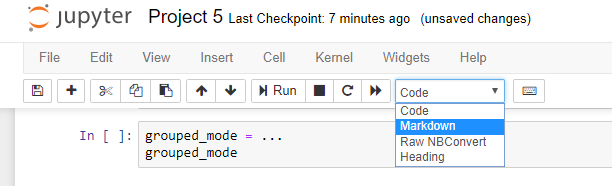

In addition, to save your tables, use the following notation: `table.to_csv(<any file name>.csv)`

In [ ]:
### EXAMPLE CODE CELL

## [IMPORTANT] Saving + Downloading Your Graphs and Tables

It is vital that you run the following code cell to save the tables you've made in this notebook to the Output folder. 

**Reminder:** By default, all the graphs you create with `histogram` and `barchart` functions are saved in the "Output" folder as well. Be sure to include these graphs in your write-up!

In [ ]:
### Saving all the tables you've made
cleaned_data.to_csv("Output/cleaned_data.csv")
age_counts.to_csv("Output/age_counts.csv")
mar_counts.to_csv("Output/mar_counts.csv")
age_mar_cross_tab.to_csv("Output/age_mar_cross_tab.csv")
grouped_mean.to_csv("Output/grouped_mean.csv")
grouped_median.to_csv("Output/grouped_median.csv")
grouped_mode.to_csv("Output/grouped_mode.csv")

To navigate to the "Output" folder:
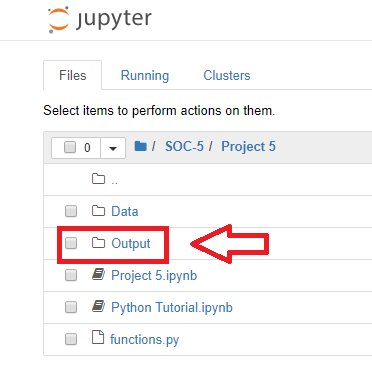

To download a specific file, check the box next to it and click the "Download" button in the top toolbar:
<br>
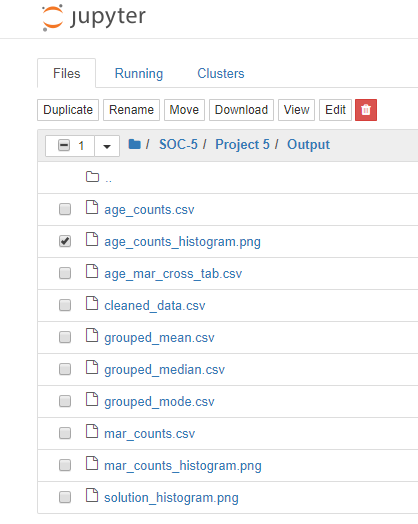

You can open the .csv files using any spreadsheet software, such as Microsoft Excel or Google Sheets.

## Final Survey <a id='section7'></a>

Congrats! You've finished the final Jupyter Notebook assignment! The Division of Data Sciences and Information would like to ask you to fill this survey out as a part of your project. We would like to improve this module for future semesters, and would really appreciate it if you took the time to fill this out and give us feedback!

Please make sure you are logged into your Berkeley (.edu) email address to access the form.
### [Survey Link](https://goo.gl/forms/FqSRIYCzAAOfZ5Bv2)

Alternatively, please copy and paste this link into your URL bar: https://goo.gl/forms/FqSRIYCzAAOfZ5Bv2

---
The Sociology 5 Spring 2019 Module was developed by: William McEachen, William Sheu, Maria Sooklaris, and Sasank Chaganty

Data Science Modules: http://data.berkeley.edu/education/modules